## 1. Write a program to demonstrate the working of the decision tree based ID3 algorithm on a given data set and apply this knowledge to classify a new sample

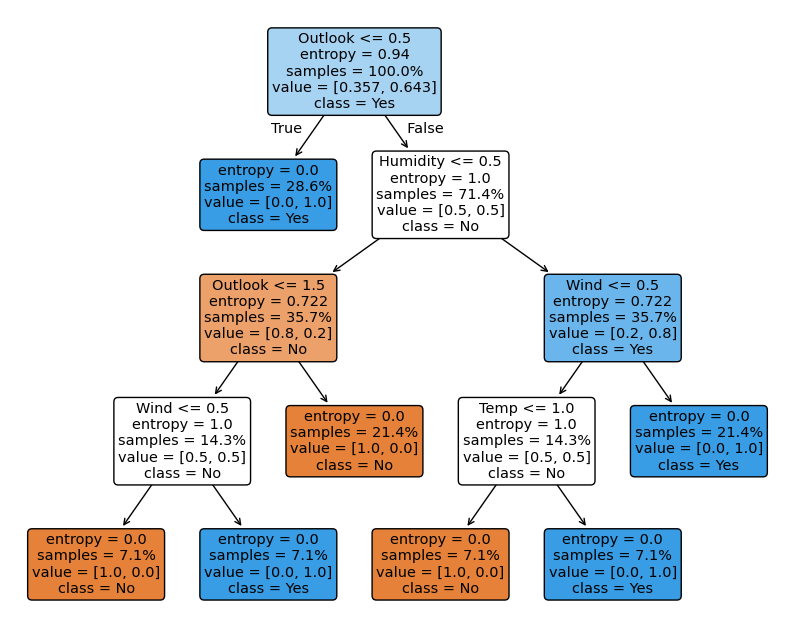

The predicted decision for the sample is: Yes


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)
encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

x = df.drop(columns=["Play"])
y = df["Play"]

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x, y)

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoders["Play"].classes_,  proportion=True, rounded=True, filled=True)
plt.show()

sample = pd.DataFrame([["Sunny", "Mild", "Normal", "Weak"]], columns=x.columns)

for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

predicted = encoders["Play"].inverse_transform(clf.predict(sample))

print(f"The predicted decision for the sample is: {predicted[0]}")